# **TEAM 12. Running Machine - Predicting Heart Disease Rate of College Students**

## Contents
0. Environment
1.   Data Import (kaggle api verification)
2.   Data Preprocessing
3. Logistic Regression Model
- w/o SMOTE
- w/ SMOTE
4. Random Forest Classification Model
- w/o SMOTE
- w/ SMOTE

5. GBC & XGB
- GBC
  - w/o SMOTE
  - w/ SMOTE
- XGB

6. Model Assessment
7. Interpretation of result


---




# 0. Environment

In [ ]:
# cpu 확인
!head /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0


In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
# 메모리 정보 확인
!head -n 3 /proc/meminfo

MemTotal:       13297228 kB
MemFree:        10180252 kB
MemAvailable:   12398768 kB


# 1. Data Import

df : 모든 feature 전처리 완료

  ㄴ X_train, y_train : oversampling 처리 x

  ㄴ X_train_balanced, y_train_balanced : oversampling 처리 o

In [ ]:
import pandas as pd
import numpy as np

data source https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

In [ ]:
# 캐글 데이터셋 가져오기
# 참고한 코드 https://kubig-2021-2.tistory.com/35

In [ ]:
!pip install kaggle
from google.colab import files
files.upload() # 캐글 api 파일 업로드하면 됨

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jadujadusleepy","key":"59d07d513d19f2f8d261881a8b4dfa27"}'}

In [ ]:
ls -1ha kaggle.json

kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Permission Warning 방지
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# 주소 앞에 ! 붙이기
!kaggle datasets download -d kamilpytlak/personal-key-indicators-of-heart-disease

  0% 0.00/3.13M [00:00<?, ?B/s]
100% 3.13M/3.13M [00:00<00:00, 178MB/s]


In [ ]:
!unzip '/content/personal-key-indicators-of-heart-disease.zip'

Archive:  /content/personal-key-indicators-of-heart-disease.zip
  inflating: heart_2020_cleaned.csv  


# 2. Data Preprocessing

데이터 전처리 참고
https://bigdaheta.tistory.com/15
https://ai-creator.tistory.com/577

In [ ]:
df = pd.read_csv('/content/heart_2020_cleaned.csv')

In [ ]:
df.shape

(319795, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
#check null
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [ ]:
df.tail()

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
319790          Yes  27.41     Yes              No     No             7.0   
319791           No  29.84     Yes              No     No             0.0   
319792           No  24.24      No              No     No             0.0   
319793           No  32.81      No              No     No             0.0   
319794           No  46.56      No              No     No             0.0   

        MentalHealth DiffWalking     Sex  AgeCategory      Race Diabetic  \
319790           0.0         Yes    Male        60-64  Hispanic      Yes   
319791           0.0          No    Male        35-39  Hispanic       No   
319792           0.0          No  Female        45-49  Hispanic       No   
319793           0.0          No  Female        25-29  Hispanic       No   
319794           0.0          No  Female  80 or older  Hispanic       No   

       PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
319790               No       Fair        6.0    Yes            No         No  
319791              Yes  Very good        5.0    Yes            No         No  
319792              Yes       Good        6.0     No            No         No  
319793               No       Good       12.0     No            No         No  
319794              Yes       Good        8.0     No            No         No

BMI 분류

In [ ]:
bins = [0, 18.5, 23, 25, 30, np.inf]
names = ['Underweight (BMI < 18.5)', 'Normal weight (18.5 <= BMI < 23.0)', 'Overweight (23.0 <= BMI < 25.0)', 'Obese (25.0 <= BMI < 30.0)', 'Extremly Obese (BMI >= 30.0)']
df['BMICategory'] = pd.cut(df['BMI'], bins, labels=names)
df.drop('BMI',axis=1,inplace=True)

In [ ]:
df['BMICategory'].value_counts()

Obese (25.0 <= BMI < 30.0)            114355
Extremly Obese (BMI >= 30.0)          102548
Normal weight (18.5 <= BMI < 23.0)     52845
Overweight (23.0 <= BMI < 25.0)        44933
Underweight (BMI < 18.5)                5114
Name: BMICategory, dtype: int64

In [ ]:
df.tail()

HeartDisease Smoking AlcoholDrinking Stroke  PhysicalHealth  \
319790          Yes     Yes              No     No             7.0   
319791           No     Yes              No     No             0.0   
319792           No      No              No     No             0.0   
319793           No      No              No     No             0.0   
319794           No      No              No     No             0.0   

        MentalHealth DiffWalking     Sex  AgeCategory      Race Diabetic  \
319790           0.0         Yes    Male        60-64  Hispanic      Yes   
319791           0.0          No    Male        35-39  Hispanic       No   
319792           0.0          No  Female        45-49  Hispanic       No   
319793           0.0          No  Female        25-29  Hispanic       No   
319794           0.0          No  Female  80 or older  Hispanic       No   

       PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  \
319790               No       Fair        6.0    Yes            No         No   
319791              Yes  Very good        5.0    Yes            No         No   
319792              Yes       Good        6.0     No            No         No   
319793               No       Good       12.0     No            No         No   
319794              Yes       Good        8.0     No            No         No   

                            BMICategory  
319790       Obese (25.0 <= BMI < 30.0)  
319791       Obese (25.0 <= BMI < 30.0)  
319792  Overweight (23.0 <= BMI < 25.0)  
319793     Extremly Obese (BMI >= 30.0)  
319794     Extremly Obese (BMI >= 30.0)

change the categorical features into numerical values

In [ ]:
df['HeartDisease'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df['Smoking'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df['AlcoholDrinking'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df['Stroke'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df['DiffWalking'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df['Sex'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
df['AgeCategory'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [ ]:
df['Race'].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [ ]:
df['Diabetic'].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [ ]:
df['GenHealth'].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [ ]:
df['BMICategory'].unique()

['Underweight (BMI < 18.5)', 'Normal weight (18.5 <= BMI < 23.0)', 'Obese (25.0 <= BMI < 30.0)', 'Overweight (23.0 <= BMI < 25.0)', 'Extremly Obese (BMI >= 30.0)']
Categories (5, object): ['Underweight (BMI < 18.5)' < 'Normal weight (18.5 <= BMI < 23.0)' <
                         'Overweight (23.0 <= BMI < 25.0)' < 'Obese (25.0 <= BMI < 30.0)' <
                         'Extremly Obese (BMI >= 30.0)']

In [ ]:
df =  df[df.columns].replace({'Yes':1, 'No':0, 'Male':1, 'Female':0, 'No, borderline diabetes':'0', 'Yes (during pregnancy)':'1' })
df['Diabetic'] = df['Diabetic'].astype(int)

In [ ]:
categories = {"18-24":0, "25-29":1, "30-34":2, "35-39":3, "40-44":4, "45-49":5, "50-54":6, "55-59":7, "60-64":8, "65-69":9, "70-74":10, "75-79":11, "80 or older":12}
df['AgeCategory']= df['AgeCategory'].map(categories)

categories = {"White":0, "Black":1, "Asian":2, "American Indian/Alaskan Native":3, "Hispanic":4, "Other":5}
df['Race']= df['Race'].map(categories)

categories = {"Poor":0, "Fair":1, "Good":2, "Very good":3, "Excellent":4}
df['GenHealth']= df['GenHealth'].map(categories)

In [ ]:
categories = {"Underweight (BMI < 18.5)":0, "Normal weight (18.5 <= BMI < 23.0)":1, "Overweight (23.0 <= BMI < 25.0)":2, "Obese (25.0 <= BMI < 30.0)":3, "Extremly Obese (BMI >= 30.0)":4}
df['BMICategory']= df['BMICategory'].map(categories)

In [ ]:
# categorical dtypes to numerical dtypes
df = df.astype({'BMICategory':'int64'})

In [ ]:
# check Null value
df.isnull().values.any()

False

In [ ]:
df.tail()

HeartDisease  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
319790             1        1                0       0             7.0   
319791             0        1                0       0             0.0   
319792             0        0                0       0             0.0   
319793             0        0                0       0             0.0   
319794             0        0                0       0             0.0   

        MentalHealth  DiffWalking  Sex  AgeCategory  Race  Diabetic  \
319790           0.0            1    1            8     4         1   
319791           0.0            0    1            3     4         0   
319792           0.0            0    0            5     4         0   
319793           0.0            0    0            1     4         0   
319794           0.0            0    0           12     4         0   

        PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  \
319790                 0          1        6.0       1              0   
319791                 1          3        5.0       1              0   
319792                 1          2        6.0       0              0   
319793                 0          2       12.0       0              0   
319794                 1          2        8.0       0              0   

        SkinCancer  BMICategory  
319790           0            3  
319791           0            3  
319792           0            2  
319793           0            4  
319794           0            4

imbalance problem (9:1)

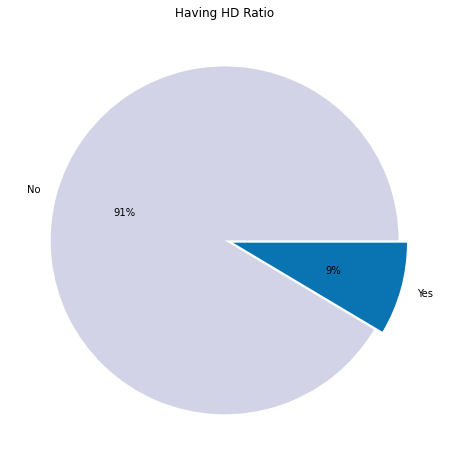

In [ ]:
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
fig, ax = plt.subplots(1, 1,figsize =(15, 8))
ax.pie(df['HeartDisease'].value_counts(),autopct='%1.0f%%',labels=['No',"Yes"],explode=(0,0.05),colors=['#D2D3E7','#0A73B2'])
ax.set_title('Having HD Ratio')
fig.show()

In [ ]:
X = df.drop('HeartDisease',axis=1)
Y = df['HeartDisease']

# train test val 60 20 20
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify = Y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify = y_train)

In [ ]:
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (191877, 17)
Shape of testing feature: (63959, 17)
Shape of training label: (191877,)
Shape of training label: (63959,)


In [ ]:
X_train.isnull().sum()

Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
BMICategory         0
dtype: int64

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191877 entries, 112905 to 274888
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Smoking           191877 non-null  int64  
 1   AlcoholDrinking   191877 non-null  int64  
 2   Stroke            191877 non-null  int64  
 3   PhysicalHealth    191877 non-null  float64
 4   MentalHealth      191877 non-null  float64
 5   DiffWalking       191877 non-null  int64  
 6   Sex               191877 non-null  int64  
 7   AgeCategory       191877 non-null  int64  
 8   Race              191877 non-null  int64  
 9   Diabetic          191877 non-null  int64  
 10  PhysicalActivity  191877 non-null  int64  
 11  GenHealth         191877 non-null  int64  
 12  SleepTime         191877 non-null  float64
 13  Asthma            191877 non-null  int64  
 14  KidneyDisease     191877 non-null  int64  
 15  SkinCancer        191877 non-null  int64  
 16  BMICategory    

In [ ]:
# SMOTE: 낮은 비율로 존재하는 클래스의 데이터를 최근접 이웃[k-NN 알고리즘] 알고리즘을 활용하여 새롭게 생성하는 방법이다. 
# 오버 샘플링 기법 중 단순 무작위 추출을 통해 데이터의 수를 늘리는 방법도 존재하는데, 데이터를 단순하게 복사하기 때문에 과적합 문제가 발생하기도 한다. 
# 이에 반해 SMOTE는 알고리즘을 기반으로 데이터를 생성하므로, 과적합 발생 가능성이 단순 무작위 방법보다 적다.

from imblearn.over_sampling import SMOTE
over = SMOTE()
X_train_balanced,y_train_balanced = over.fit_resample(X_train, y_train)

In [ ]:
X_train_balanced.isnull().sum()

Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
BMICategory         0
dtype: int64

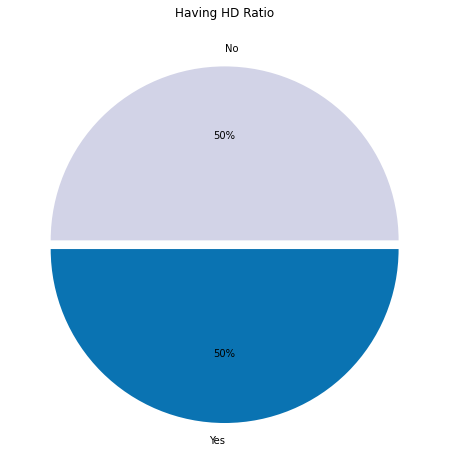

In [ ]:
fig, ax = plt.subplots(1, 1,figsize =(15, 8))
ax.pie(y_train_balanced.value_counts(),autopct='%1.0f%%',labels=['No',"Yes"],explode=(0,0.05),colors=['#D2D3E7','#0A73B2'])
ax.set_title('Having HD Ratio')
fig.show()

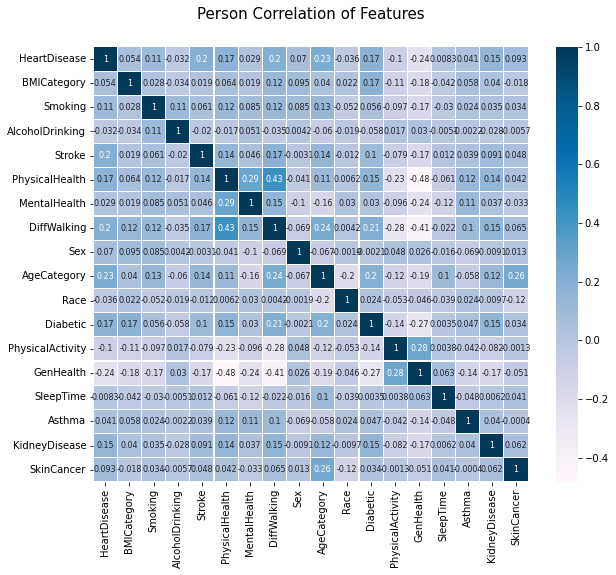

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


heatmap_data = df[["HeartDisease", "BMICategory", "Smoking", "AlcoholDrinking", "Stroke", "PhysicalHealth", "MentalHealth", "DiffWalking", "Sex", "AgeCategory", "Race", "Diabetic", "PhysicalActivity", "GenHealth", "SleepTime", "Asthma", "KidneyDisease", "SkinCancer"]]
# BMI 데이터 수치 상태로 확인
# heatmap_data = df[["HeartDisease", "BMI", "Smoking", "AlcoholDrinking", "Stroke", "PhysicalHealth", "MentalHealth", "DiffWalking", "Sex", "AgeCategory", "Race", "Diabetic", "PhysicalActivity", "GenHealth", "SleepTime", "Asthma", "KidneyDisease", "SkinCancer"]]

colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Person Correlation of Features", y = 1.05, size = 15)

sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 8})
sns.set(font_scale=2)

> dataset list

* **not oversampled:**

 - X_train / y_train (60)
 - X_val / y_val (20) -> for hyperparameter tuning
 - X_test / y_test (20)

* **oversampled**

 - X_train_balanced / y_train_balanced

# 3. Logistic Regression Model

### Without SMOTE (imbalanced)

<br>
1. Standardize the data values.

In [ ]:
# 로지스틱 회귀는 데이터 정규화가 필요.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#Test쪽은 Transform만
X_train_lr = scaler.fit_transform(X_train)
X_val_lr = scaler.fit_transform(X_val)
y_train_lr = y_train
y_val_lr = y_val

<br>
2. Build a model with hyperparamters of default values.

In [ ]:
from sklearn.linear_model import LogisticRegression

lrmodel = LogisticRegression()
lrmodel.fit(X_train_lr, y_train_lr)

LogisticRegression()

In [ ]:
from sklearn.metrics import f1_score
y_pred = lrmodel.predict(X_val_lr)
f1_score(y_pred, y_val_lr)

0.18043279487960986

In [ ]:
# 순서
# Smoking, AlcoholDrinking, Stroke, PhysicalHealth,	MentalHealth,
# DiffWalking, Sex, AgeCategory, Race, Diabetic,
# PhysicalActivity, GenHealth, SleepTime, Asthma, KidneyDisease,
# SkinCancer, BMICategory

lrmodel.coef_

array([[ 0.1783015 , -0.05058868,  0.20005749,  0.02449924,  0.03748833,
         0.07723042,  0.36068649,  0.98079973, -0.04742012,  0.1559251 ,
         0.00722637, -0.50337526, -0.03500532,  0.09522671,  0.10874221,
         0.03844158,  0.08414494]])

In [ ]:
from sklearn.model_selection import cross_val_score

X_train_lr_cv = scaler.fit_transform(X_train)
y_train_lr_cv = y_train
scores = cross_val_score(lrmodel, X_train_lr_cv, y_train_lr_cv, cv=5)
f1_scores = cross_val_score(lrmodel, X_train_lr_cv, y_train_lr_cv, scoring = "f1",cv=5)
print(scores)
print(sum(scores)/len(scores))
print(f1_scores)
print(sum(f1_scores)/len(f1_scores))

[0.91669272 0.91580675 0.91455375 0.91580456 0.91580456]
0.9157324690580907
[0.1871345  0.16876769 0.17509434 0.18676063 0.19042846]
0.18163712560689055


<br>
3. Tune the hyperparameters by GridSearch (target parameters : C)

In [ ]:
from sklearn.model_selection import GridSearchCV

# 각 parameter 후보 개수 : 5
params ={
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}

grid_ac = GridSearchCV(lrmodel, param_grid=params, scoring="accuracy")
grid_ac.fit(X_train_lr, y_train_lr)

grid_f1 = GridSearchCV(lrmodel, param_grid=params, scoring="f1")
grid_f1.fit(X_train_lr, y_train_lr)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]}, scoring='f1')

In [ ]:
print(grid_ac.best_params_)
print("Accuracy :", grid_ac.best_score_)

{'C': 0.001}
Accuracy : 0.9160868659089998


In [ ]:
print(grid_f1.best_params_)
print("f1 score :", grid_f1.best_score_)

{'C': 100}
f1 score : 0.18182198469652872


**Best Model (Accuracy / F1 score)**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

lrmodel_best_ac = LogisticRegression(C=0.001)
lrmodel_best_ac.fit(X_train_lr, y_train_lr)
lr_pred_ac = lrmodel_best_ac.predict(X_val_lr)

lrmodel_best_f1 = LogisticRegression(C=1)
lrmodel_best_f1.fit(X_train_lr, y_train_lr)
lr_pred_f1 = lrmodel_best_f1.predict(X_val_lr)

**Confusion Matrix & Recall, Precision, F1 score**<br>

Confusion Matrix


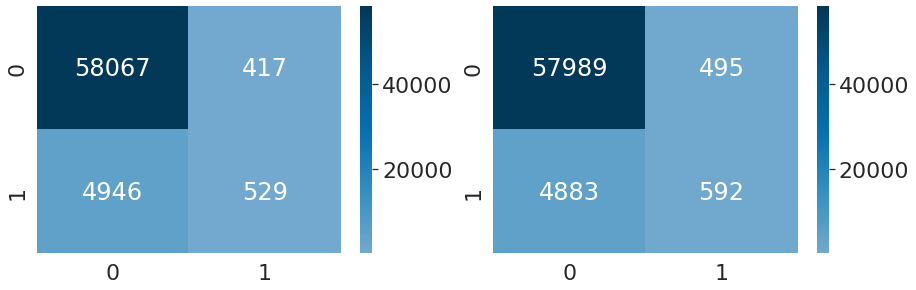

In [ ]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
CM_LR = confusion_matrix(y_val_lr, lr_pred_ac)
sns.heatmap(CM_LR, center=True, cmap = colormap, linecolor = "white", annot = True, fmt = 'd')

plt.subplot(2, 2, 2)
CM_LR = confusion_matrix(y_val_lr, lr_pred_f1)
sns.heatmap(CM_LR, center=True, cmap = colormap, linecolor = "white", annot = True, fmt = 'd')
plt.show()

In [ ]:
print("Best Model (Accuracy) C= 0.001")
print("accuracy score \t :",accuracy_score(y_val_lr, lr_pred_ac))
print("precision score\t :",precision_score(y_val_lr, lr_pred_ac))
print("recall score \t :",recall_score(y_val_lr, lr_pred_ac))
print("f1 score \t :",f1_score(y_val_lr, lr_pred_ac))
print("")

print("Best Model (F1 score) C= 1")
print("accuracy score \t :",accuracy_score(y_val_lr, lr_pred_f1))
print("precision score\t :",precision_score(y_val_lr, lr_pred_f1))
print("recall score \t :",recall_score(y_val_lr, lr_pred_f1))
print("f1 score \t :",f1_score(y_val_lr, lr_pred_f1))

Best Model (Accuracy) C= 0.001
accuracy score 	 : 0.9161494082146375
precision score	 : 0.5591966173361522
recall score 	 : 0.09662100456621005
f1 score 	 : 0.16477184239215076

Best Model (F1 score) C= 1
accuracy score 	 : 0.9159148829719038
precision score	 : 0.5446182152713891
recall score 	 : 0.10812785388127853
f1 score 	 : 0.18043279487960986


True Positive가 낮다.

-------------------------------------------------------------------------------

###with SMOTE

<br>
1. Standardize the data values.

In [ ]:
# 로지스틱 회귀는 데이터 정규화가 필요함
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_lr_b = scaler.fit_transform(X_train_balanced)
X_val_lr_b = scaler.fit_transform(X_val)
y_train_lr_b = y_train_balanced
y_val_lr_b = y_val

<br>
2. Build a model with hyperparamters of default values.

In [ ]:
from sklearn.linear_model import LogisticRegression

lrmodel_b = LogisticRegression()
lrmodel_b.fit(X_train_lr_b, y_train_lr_b)

LogisticRegression()

In [ ]:
lrmodel_b.score(X_val_lr_b, y_val_lr_b)

0.5804187057333604

In [ ]:
# 순서
# Smoking AlcoholDrinking Stroke PhysicalHealth	MentalHealth
# DiffWalking Sex AgeCategory Race Diabetic
# PhysicalActivity GenHealth SleepTime Asthma KidneyDisease
# SkinCancer BMICategory

lrmodel_b.coef_

array([[ 0.01162409, -0.33483284,  0.03358437,  0.01111348,  0.03611304,
        -0.16953348,  0.22605139,  0.99556047, -0.14257777, -0.01962758,
        -0.19398271, -1.06924307, -0.03164262, -0.19129943, -0.09083435,
        -0.11770964,  0.01468217]])

In [ ]:
from sklearn.model_selection import cross_val_score

X_train_lr_cv_b = scaler.fit_transform(X_train_balanced)
y_train_lr_cv_b = y_train_balanced
scores_b = cross_val_score(lrmodel_b, X_train_lr_cv_b, y_train_lr_cv_b, cv=5)
f1_scores_b = cross_val_score(lrmodel_b, X_train_lr_cv_b, y_train_lr_cv_b, scoring = "f1",cv=5)
print(scores_b)
print(sum(scores_b)/len(scores_b))
print(f1_scores_b)
print(sum(f1_scores_b)/len(f1_scores_b))

[0.74293979 0.76942806 0.76590864 0.76486513 0.76983799]
0.7625959211852746
[0.74124009 0.77540597 0.77246098 0.77122498 0.77623395]
0.7673131912019717


<br>
3. Tune the hyperparameters by GridSearch (target parameters : C)

In [ ]:
from sklearn.model_selection import GridSearchCV

# 각 parameter 후보 개수 : 5
params ={
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}

grid_b_ac = GridSearchCV(lrmodel_b, param_grid=params, scoring="accuracy")
grid_b_ac.fit(X_train_lr_b, y_train_lr_b)
grid_b_f1 = GridSearchCV(lrmodel_b, param_grid=params, scoring="f1")
grid_b_f1.fit(X_train_lr_b, y_train_lr_b)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]}, scoring='f1')

In [ ]:
print(grid_b_ac.best_params_)
print("Accuracy :", grid_b_ac.best_score_)
print(grid_b_f1.best_params_)
print("f1 score :", grid_b_f1.best_score_)

{'C': 0.001}
Accuracy : 0.7627241596822867
{'C': 0.001}
f1 score : 0.7676111129314899


**Best Model (Accuracy / F1 score)**

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

lrmodel_best_ac_b = LogisticRegression(C=0.1)
lrmodel_best_ac_b.fit(X_train_lr_b, y_train_lr_b)
lr_pred_ac_b = lrmodel_best_ac_b.predict(X_val_lr_b)

lrmodel_best_f1_b = LogisticRegression(C=0.001)
lrmodel_best_f1_b.fit(X_train_lr_b, y_train_lr_b)
lr_pred_f1_b = lrmodel_best_f1_b.predict(X_val_lr_b)

print("f1 score(C = 0.1) :",f1_score(y_val_lr_b, lr_pred_ac_b))
print("accuracy score(C = 0.1) :",accuracy_score(y_val_lr_b, lr_pred_ac_b))
print("")
print("f1 score(C = 0.001) :",f1_score(y_val_lr_b, lr_pred_f1_b))
print("accuracy score(C = 0.001) :",accuracy_score(y_val_lr_b, lr_pred_f1_b))



f1 score(C = 0.1) : 0.2641478394384734
accuracy score(C = 0.1) : 0.5803874357009959

f1 score(C = 0.001) : 0.2645705521472393
accuracy score(C = 0.001) : 0.5801685454744445


**Confusion Matrix & Recall, Precision, F1 score**<br>

Confusion Matrix


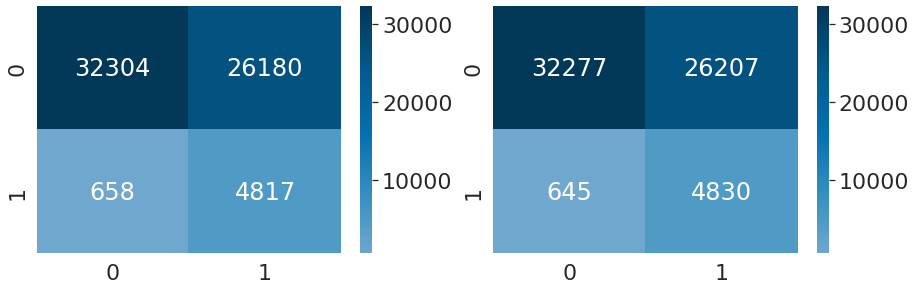

In [ ]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
CM_LR = confusion_matrix(y_val_lr_b, lr_pred_ac_b)
sns.heatmap(CM_LR, center=True, cmap = colormap, linecolor = "white", annot = True, fmt = 'd')

plt.subplot(2, 2, 2)
CM_LR = confusion_matrix(y_val_lr_b, lr_pred_f1_b)
sns.heatmap(CM_LR, center=True, cmap = colormap, linecolor = "white", annot = True, fmt = 'd')
plt.show()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

lr_b_pred = lrmodel_b.predict(X_val_lr)

print("Accuracy score : ", accuracy_score(y_val_lr, lr_b_pred))
print("Precision score : ", precision_score(y_val_lr, lr_b_pred))
print("Recall score : ", recall_score(y_val_lr, lr_b_pred))
print("f1 score : ", f1_score(y_val_lr, lr_b_pred))

Accuracy score :  0.5804187057333604
Precision score :  0.15541216325213744
Recall score :  0.8798173515981735
f1 score :  0.2641623251987935




---



# 4. RandomForest Classification Model


### Without SMOTE (imbalanced)

<br>
1. Build a model with hyperparamters of default values(RandomForestClassifier)

In [ ]:
import time
from sklearn.ensemble import RandomForestClassifier 
start_time = time.time()
rfmodel = RandomForestClassifier(n_estimators=100, min_samples_split=2, max_depth=None, criterion='gini', random_state=12) #default hyperparamter values
rfmodel.fit(X_train, y_train)
print("execution time: ", time.time() - start_time)

execution time:  22.50708293914795


<br>
2. Tune the hyperparameters by Random Search (target parameters : n_estimators, max_depth, min_samples_leaf, min_samples_split, criterion)

In [ ]:
# GridSearch의 시간 문제로 RandomSearch 활용. 주어진 parameter들의 조합 중 n_iter값(아래 예시:100) 개수의 조합을 랜덤으로 만들어서 테스트함.
from sklearn.model_selection import RandomizedSearchCV

# 4 candidates for each parameter (except criterion)
params ={
    'n_estimators':[50, 100, 150, 200], #default: 100
    'max_depth':[6, 10, 15, None], #default: None 
    'min_samples_leaf':[3, 5, 7, 10], #default : 
    'min_samples_split':[2, 3, 5, 10], #default : 2
    'criterion': ['gini', 'entropy'] #default: gini
}

start_time = time.time()
rand_search = RandomizedSearchCV(rfmodel, param_distributions = params, scoring = 'f1', refit=True, n_iter = 100, cv = 3) 
rand_search.fit(X_train, y_train)
print("execution time: ", time.time() - start_time)

execution time:  3750.0442645549774


**Best RF parameters (scoring : f1 score)** <br>


In [ ]:
rfmodel_best = rand_search.best_estimator_
print("Best parameters : ", rand_search.best_params_)
print("Best f1 score :", rand_search.best_score_)

Best parameters :  {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_depth': None, 'criterion': 'gini'}
Best f1 score : 0.13265993702804496


Best parameters :  {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_depth': None, 'criterion': 'entropy'}<br>
Best f1 score : 0.12762953859189638

**Confusion Matrix & Recall, Precision, F1 score**<br>

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


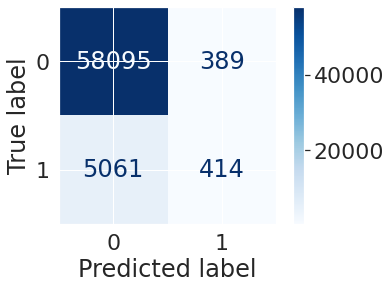

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(rfmodel_best, X_val, y_val, cmap=plt.cm.Blues)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

rf_pred = rfmodel_best.predict(X_val)

print("Accuracy score : ", accuracy_score(y_val, rf_pred))
print("Precision score : ", precision_score(y_val, rf_pred))
print("Recall score : ", recall_score(y_val, rf_pred))
print("f1 score : ", f1_score(y_val, rf_pred))

Accuracy score :  0.9147891618067825
Precision score :  0.5155666251556662
Recall score :  0.07561643835616438
f1 score :  0.13188913666772858


###with SMOTE

<br>
1. Build a model with hyperparamters of default values(RandomForestClassifier)

In [ ]:
from sklearn.metrics import accuracy_score
import time 
start_time = time.time()

#Now train with the balanced dataset
rfmodel_smote = RandomForestClassifier(n_estimators=100, min_samples_split=2, max_depth=None, criterion='gini', random_state=12) #default hyperparamter values
rfmodel_smote.fit(X_train_balanced, y_train_balanced)

print("execution time: ", time.time() - start_time)

execution time:  54.30475187301636


<br>
2. Assess the default model with validation dataset

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

rf_smote_pred = rfmodel_smote.predict(X_val)

print("Accuracy score : ", accuracy_score(y_val, rf_smote_pred))
print("Precision score : ", precision_score(y_val, rf_smote_pred))
print("Recall score : ", recall_score(y_val, rf_smote_pred))
print("f1 score : ", f1_score(y_val, rf_smote_pred))

Accuracy score :  0.8282806172704389
Precision score :  0.2152605459057072
Recall score :  0.3802739726027397
f1 score :  0.27490592196474556


<br>
3. Plug in the hyperparameters that is resulted from the previous randomized search and assess the model with validation dataset

In [ ]:
# hyperparameters from grid search of previous result
rfmodel_smote_tuned = RandomForestClassifier(n_estimators=150, min_samples_split= 5, min_samples_leaf= 3, max_depth= None, criterion= 'entropy')
rfmodel_smote_tuned.fit(X_train_balanced, y_train_balanced)

rf_smote_tuned_pred = rfmodel_smote_tuned.predict(X_val)

print("Accuracy score : ", accuracy_score(y_val, rf_smote_tuned_pred))
print("Precision score : ", precision_score(y_val, rf_smote_tuned_pred))
print("Recall score : ", recall_score(y_val, rf_smote_tuned_pred))
print("f1 score : ", f1_score(y_val, rf_smote_tuned_pred))

Accuracy score :  0.8145687080786128
Precision score :  0.23429047024552643
Recall score :  0.5141552511415525
f1 score :  0.3218982275586049


The tuned model seems to be better than the default one.

No cross validation with the oversampled dataset😐

**Confusion Matrix & Recall, Precision, F1 score**<br>

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


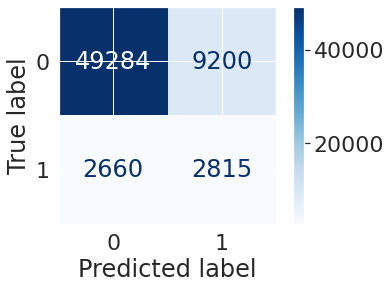

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(rfmodel_smote_tuned, X_val, y_val, cmap=plt.cm.Blues)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

rf_pred_smote_tuned = rfmodel_smote_tuned.predict(X_val)

print("Accuracy score : ", accuracy_score(y_val, rf_pred_smote_tuned ))
print("Precision score : ", precision_score(y_val, rf_pred_smote_tuned ))
print("Recall score : ", recall_score(y_val, rf_pred_smote_tuned ))
print("f1 score : ", f1_score(y_val, rf_pred_smote_tuned ))

Accuracy score :  0.8145687080786128
Precision score :  0.23429047024552643
Recall score :  0.5141552511415525
f1 score :  0.3218982275586049


# 5. GBC, XGB

### GBC(=GBM)

https://woolulu.tistory.com/30 참고

**Parameter**


Learning_rate = 0.1 (Default) 
→ 높일수록 강한 보정, 오차 보정 정도가 커짐. 값을 낮춰 오버피팅 방지

N_estimators = 100 (Default) 
→ 값이 커질수록 앙상블에 트리가 많이 추가되어 복잡도가 커지고, 훈련 세트의 fitting이 더 정확해짐

Max_depth = 3 (Default)
→ 1~5 정도의 깊이, Overfitting을 막기 위해 깊이를 줄임 (가지치기) 


### Without SMOTE (imbalanced)

<br>
1. Build a model with hyperparamters of default values

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBCModel = GradientBoostingClassifier(n_estimators=250, max_depth=3, learning_rate=0.1)
start_time = time.time()
GBCModel.fit(X_train, y_train)
print("execution time: ", time.time() - start_time)

execution time:  51.27446913719177


<br>
2. Assess the default model with cross-validation

In [ ]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

kfold = KFold(n_splits=10)

results = cross_validate(estimator=GBCModel,
                                          X=X_train,
                                          y=y_train,
                                          cv=kfold,
                                          scoring=scoring)
pd.DataFrame(results)

fit_time  score_time  test_accuracy  test_precision  test_recall  \
0  53.139437    0.278512       0.916875        0.542254     0.095120   
1  51.117292    0.095860       0.918126        0.571956     0.096273   
2  57.163556    0.143145       0.917657        0.615658     0.105167   
3  59.137263    0.096672       0.914686        0.544776     0.087899   
4  47.622823    0.101175       0.918334        0.590734     0.094796   
5  55.213680    0.134388       0.915468        0.589744     0.082933   
6  46.502878    0.102757       0.914686        0.559140     0.093413   
7  54.804828    0.111651       0.912284        0.486301     0.084776   
8  56.904577    0.198715       0.915203        0.560000     0.084490   
9  58.051255    0.097432       0.916558        0.514599     0.087632   

   test_f1_score  
0       0.161850  
1       0.164806  
2       0.179647  
3       0.151374  
4       0.163374  
5       0.145416  
6       0.160082  
7       0.144382  
8       0.146827  
9       0.149761

<br>
3. Tune the hyperparameters by Grid Search (target parameters : n_estimators, learning_rate, max_depth)

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [100, 150, 200],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5]
}

grid_ac = GridSearchCV(GBCModel, param_grid=params, scoring="accuracy")
grid_ac.fit(X_train, y_train)

grid_f1 = GridSearchCV(GBCModel, param_grid=params, scoring="f1")
grid_f1.fit(X_train, y_train)


GridSearchCV(estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 150, 200]},
             scoring='f1')

In [ ]:
print(grid_ac.best_params_)
print("Accuracy :", grid_ac.best_score_)

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 150}
Accuracy : 0.916238010048354


In [ ]:
print(grid_f1.best_params_)
print("f1 score :", grid_f1.best_score_)

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}
f1 score : 0.16550987337102158


**Best GBC Model (Accuracy / F1 score)** <br>

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

GBCModel_best_ac = GradientBoostingClassifier(n_estimators=150, max_depth=3, learning_rate=0.05)
GBCModel_best_ac.fit(X_train, y_train)
GBCModel_pred_ac = GBCModel_best_ac.predict(X_val)

GBCModel_best_f1 = GradientBoostingClassifier(n_estimators=150, max_depth=5, learning_rate=0.1)
GBCModel_best_f1.fit(X_train, y_train)
GBCModel_pred_f1 = GBCModel_best_f1.predict(X_val)

**Confusion Matrix & Recall, Precision, F1 score**<br>

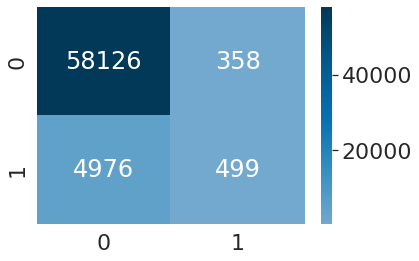

Confusion Matrix is
 [[58126   358]
 [ 4976   499]]


In [ ]:
from sklearn.metrics import confusion_matrix
y_pred_GB = GBCModel.predict(X_val)
CM_GB = confusion_matrix(y_val, y_pred_GB)

sns.heatmap(CM_GB, center=True, cmap = colormap, linecolor = "white", annot = True, fmt = 'd')
plt.show()

print('Confusion Matrix is\n', CM_GB)

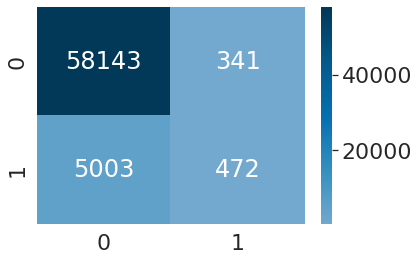

Confusion Matrix is
 [[58143   341]
 [ 5003   472]]


In [ ]:
from sklearn.metrics import confusion_matrix
y_pred_GB = GBCModel_best_ac.predict(X_val)
CM_GB = confusion_matrix(y_val, y_pred_GB)

sns.heatmap(CM_GB, center=True, cmap = colormap, linecolor = "white", annot = True, fmt = 'd')
plt.show()

print('Confusion Matrix is\n', CM_GB)

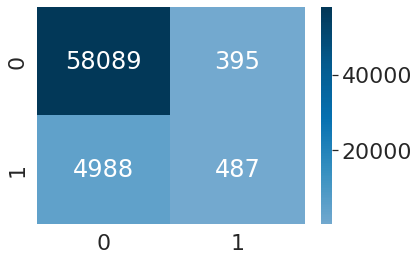

Confusion Matrix is
 [[58089   395]
 [ 4988   487]]


In [ ]:
from sklearn.metrics import confusion_matrix
y_pred_GB = GBCModel_best_f1.predict(X_val)
CM_GB = confusion_matrix(y_val, y_pred_GB)

sns.heatmap(CM_GB, center=True, cmap = colormap, linecolor = "white", annot = True, fmt = 'd')
plt.show()

print('Confusion Matrix is\n', CM_GB)

In [ ]:
print("precision score(Depth 3, Learning rate 0.05) :",precision_score(y_val, GBCModel_pred_ac))
print("precision score(Depth 5, Learning rate 0.1) :",precision_score(y_val, GBCModel_pred_f1))

print("recall score(Depth 3, Learning rate 0.05) :",recall_score(y_val, GBCModel_pred_ac))
print("recall score(Depth 5, Learning rate 0.1) :",recall_score(y_val, GBCModel_pred_f1))

print("f1 score(Depth 3, Learning rate 0.05) :",f1_score(y_val, GBCModel_pred_ac))
print("f1 score(Depth 5, Learning rate 0.1) :",f1_score(y_val, GBCModel_pred_f1))

print("accuracy score(Depth 3, Learning rate 0.05) :",accuracy_score(y_val, GBCModel_pred_ac))
print("accuracy score(Depth 5, Learning rate 0.1) :",accuracy_score(y_val, GBCModel_pred_f1))

precision score(Depth 3, Learning rate 0.05) : 0.5507246376811594
precision score(Depth 5, Learning rate 0.1) : 0.5457481162540366
recall score(Depth 3, Learning rate 0.05) : 0.08330288637194008
recall score(Depth 5, Learning rate 0.1) : 0.09261965655827549
f1 score(Depth 3, Learning rate 0.05) : 0.14471596318629007
f1 score(Depth 5, Learning rate 0.1) : 0.15836326721849134
accuracy score(Depth 3, Learning rate 0.05) : 0.915727262777717
accuracy score(Depth 5, Learning rate 0.1) : 0.9157428977938992


### with SMOTE

<br>
1. Build a model with hyperparamters of default values

In [ ]:
from sklearn.metrics import accuracy_score
import time 
start_time = time.time()

#Now train with the balanced dataset
GBCmodel_smote = GradientBoostingClassifier(n_estimators=250, max_depth=3, learning_rate=0.1)
GBCmodel_smote.fit(X_train_balanced, y_train_balanced)

print("execution time: ", time.time() - start_time)

execution time:  113.0227062702179


<br>
2. Assess the default model with validation dataset

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

GBC_smote_pred = GBCmodel_smote.predict(X_val)

print("Accuracy score : ", accuracy_score(y_val,GBC_smote_pred))
print("Precision score : ", precision_score(y_val, GBC_smote_pred))
print("Recall score : ", recall_score(y_val, GBC_smote_pred))
print("f1 score : ", f1_score(y_val, GBC_smote_pred))

Accuracy score :  0.7903031629637737
Precision score :  0.2271414821944177
Recall score :  0.6035805626598465
f1 score :  0.33006993006993


<br>
3. Plug in the hyperparameters that is resulted from the previous grid search (scoring: f1) and assess the model with the validation dataset

In [ ]:
# hyperparameters from grid search of previous result
GBCmodel_smote_tuned = GradientBoostingClassifier(n_estimators=150, max_depth=5,learning_rate=0.1)
GBCmodel_smote_tuned.fit(X_train_balanced, y_train_balanced)

GBC_smote_tuned_pred = GBCmodel_smote_tuned.predict(X_val)

print("Accuracy score : ", accuracy_score(y_val, GBC_smote_tuned_pred))
print("Precision score : ", precision_score(y_val, GBC_smote_tuned_pred))
print("Recall score : ", recall_score(y_val, GBC_smote_tuned_pred))
print("f1 score : ", f1_score(y_val, GBC_smote_tuned_pred))

Accuracy score :  0.7950718428993574
Precision score :  0.22932330827067668
Recall score :  0.5905022831050228
f1 score :  0.33035303734736626


The default model seems to be better than the tuned one.

**Confusion Matrix & Recall, Precision, F1 score**<br>

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


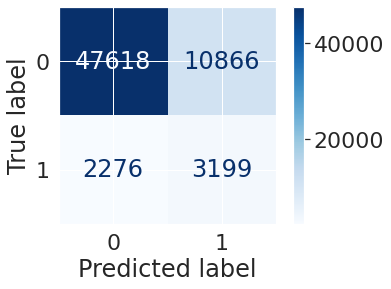

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(GBCmodel_smote_tuned, X_val, y_val, cmap=plt.cm.Blues)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

GBC_pred_smote_tuned = GBCmodel_smote_tuned.predict(X_val)

print("Accuracy score : ", accuracy_score(y_val, GBC_pred_smote_tuned ))
print("Precision score : ", precision_score(y_val, GBC_pred_smote_tuned ))
print("Recall score : ", recall_score(y_val, GBC_pred_smote_tuned ))
print("f1 score : ", f1_score(y_val, GBC_pred_smote_tuned ))

Accuracy score :  0.794524617332979
Precision score :  0.227444009953786
Recall score :  0.5842922374429224
f1 score :  0.32743091095189353


### XGBClassifier



https://injo.tistory.com/44 참고


※ Early Stopping 기능 : GBM의 경우 n_estimators에 지정된 횟수만큼 학습을 끝까지 수행하지만, XGB의 경우 오류가 더 이상 개선되지 않으면 수행을 중지한다. 

w/o SMOTE만 시도하였다. 

### Parameter
Overfitting 방지를 위해서는... 
- eta(learning rate) 값을 낮춘다.(0.01 ~ 0.1) → eta 값을 낮추면 num_boost_round(n_estimator=GBC와 동일)를 반대로 높여주어야 한다.
- max_depth 값을 낮춘다. (GBC의 max_depth와 동일) 
- min_child_weight 값을 높인다.
- gamma 값을 높인다.
- subsample과 colsample_bytree를 낮춘다.

<br>
1. Build a model with hyperparameters (max_depth = 20, n_estimators = 250, eval_metric = AUC, early_stopping_rounds = 50) 

In [ ]:
import xgboost as xgb

val_data = [(X_val, y_val)]

XGBModel = xgb.XGBClassifier(max_depth=20, n_estimators=250)

#Default Metrics : Binary classification error rate (threshold 0.5)
XGBModel.fit(X_train, y_train, early_stopping_rounds = 50, eval_set = val_data, eval_metric='auc')
print('XGBModel Train Score is : ' , XGBModel.score(X_train, y_train))
print('XGBModel Test Score is : ' , XGBModel.score(X_val, y_val))

[0]	validation_0-auc:0.827289
Will train until validation_0-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.827741
[2]	validation_0-auc:0.827893
[3]	validation_0-auc:0.828345
[4]	validation_0-auc:0.829618
[5]	validation_0-auc:0.829588
[6]	validation_0-auc:0.829091
[7]	validation_0-auc:0.829038
[8]	validation_0-auc:0.828865
[9]	validation_0-auc:0.828792
[10]	validation_0-auc:0.828756
[11]	validation_0-auc:0.828343
[12]	validation_0-auc:0.827936
[13]	validation_0-auc:0.827938
[14]	validation_0-auc:0.827543
[15]	validation_0-auc:0.827021
[16]	validation_0-auc:0.826895
[17]	validation_0-auc:0.82647
[18]	validation_0-auc:0.826218
[19]	validation_0-auc:0.82581
[20]	validation_0-auc:0.82558
[21]	validation_0-auc:0.825201
[22]	validation_0-auc:0.824798
[23]	validation_0-auc:0.824134
[24]	validation_0-auc:0.824009
[25]	validation_0-auc:0.823899
[26]	validation_0-auc:0.823592
[27]	validation_0-auc:0.823063
[28]	validation_0-auc:0.822598
[29]	validation_0-auc:0.822215
[30]	validation_0-a

<br>
2. Tune the hyperparameters by GridSearch (target parameters : max_depth, min_child_weight, colsample_bytree)

In [ ]:
# 그리드 서치에 드는 시간을 줄이기 위해 트리를 축소한 후 1차 튜닝
XGBModel_s = xgb.XGBClassifier(n_estimators=150, random_state=0)

In [ ]:
from sklearn.model_selection import GridSearchCV

#후보 파라미터
params = {
    'max_depth': [3, 5],
    'min_child_weight':[1, 3],
    'colsample_bytree': [0.5, 0.75]
}

# early stopping rounds 사용 시 evals 필수
grid_ac = GridSearchCV(XGBModel_s, param_grid=params, cv = 4, scoring="accuracy", error_score='raise')
grid_ac.fit(X_train, y_train, early_stopping_rounds = 30, eval_set = val_data, eval_metric = 'auc')

grid_f1 = GridSearchCV(XGBModel_s, param_grid=params, cv = 4, scoring="f1", error_score='raise')
grid_f1.fit(X_train, y_train, early_stopping_rounds = 30, eval_set = val_data, eval_metric = 'auc')


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[16]	validation_0-auc:0.838
[17]	validation_0-auc:0.838076
[18]	validation_0-auc:0.838439
[19]	validation_0-auc:0.838628
[20]	validation_0-auc:0.838644
[21]	validation_0-auc:0.838642
[22]	validation_0-auc:0.838569
[23]	validation_0-auc:0.838697
[24]	validation_0-auc:0.838581
[25]	validation_0-auc:0.838496
[26]	validation_0-auc:0.839172
[27]	validation_0-auc:0.839496
[28]	validation_0-auc:0.839771
[29]	validation_0-auc:0.839667
[30]	validation_0-auc:0.840003
[31]	validation_0-auc:0.840077
[32]	validation_0-auc:0.840158
[33]	validation_0-auc:0.84026
[34]	validation_0-auc:0.840293
[35]	validation_0-auc:0.840425
[36]	validation_0-auc:0.840503
[37]	validation_0-auc:0.84068
[38]	validation_0-auc:0.840815
[39]	validation_0-auc:0.84085
[40]	validation_0-auc:0.840896
[41]	validation_0-auc:0.840903
[42]	validation_0-auc:0.840946
[43]	validation_0-auc:0.841019
[44]	validation_0-auc:0.841117
[45]	validation_0-auc:0.841242
[46]	validation_0-auc:0.84133
[47]	valid

GridSearchCV(cv=4, error_score='raise',
             estimator=XGBClassifier(n_estimators=150),
             param_grid={'colsample_bytree': [0.5, 0.75], 'max_depth': [3, 5],
                         'min_child_weight': [1, 3]},
             scoring='f1')

<br>
cv 3였을 때의 결과물
<br>
{'colsample_bytree': 0.75, 'max_depth': 5, 'min_child_weight': 3}
Accuracy : 0.9162119482793664
<br>
{'colsample_bytree': 0.75, 'max_depth': 5, 'min_child_weight': 3}
f1 score : 0.1528173346349829

In [ ]:
# cv 4
print(grid_ac.best_params_)
print("Accuracy :", grid_ac.best_score_)

{'colsample_bytree': 0.75, 'max_depth': 5, 'min_child_weight': 1}
Accuracy : 0.9162067362202206


In [ ]:
# cv 4 
print(grid_f1.best_params_)
print("f1 score :", grid_f1.best_score_)

{'colsample_bytree': 0.75, 'max_depth': 5, 'min_child_weight': 3}
f1 score : 0.1581294188733815


**Best Model (Accuracy / F1 score)**

In [ ]:
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

XGBModel_best_ac = XGBClassifier(n_estimators=250, max_depth=3, min_child_weight=3, colsample_bytree = 0.75)
XGBModel_best_ac.fit(X_train, y_train, early_stopping_rounds=50, eval_set = val_data, eval_metric='auc')
XGBModel_pred_ac = XGBModel_best_ac.predict(X_val)

print('XGBModel(ac) Train Score is : ' , XGBModel_best_ac.score(X_train, y_train))
print('XGBModel(ac) Test Score is : ' , XGBModel_best_ac.score(X_val, y_val))

[0]	validation_0-auc:0.771331
Will train until validation_0-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.813858
[2]	validation_0-auc:0.815098
[3]	validation_0-auc:0.817964
[4]	validation_0-auc:0.81765
[5]	validation_0-auc:0.820139
[6]	validation_0-auc:0.826364
[7]	validation_0-auc:0.826837
[8]	validation_0-auc:0.82714
[9]	validation_0-auc:0.82731
[10]	validation_0-auc:0.82795
[11]	validation_0-auc:0.82861
[12]	validation_0-auc:0.82922
[13]	validation_0-auc:0.830703
[14]	validation_0-auc:0.832267
[15]	validation_0-auc:0.832004
[16]	validation_0-auc:0.832777
[17]	validation_0-auc:0.832777
[18]	validation_0-auc:0.833111
[19]	validation_0-auc:0.833044
[20]	validation_0-auc:0.832981
[21]	validation_0-auc:0.832857
[22]	validation_0-auc:0.833241
[23]	validation_0-auc:0.833953
[24]	validation_0-auc:0.834244
[25]	validation_0-auc:0.834556
[26]	validation_0-auc:0.835459
[27]	validation_0-auc:0.836
[28]	validation_0-auc:0.835938
[29]	validation_0-auc:0.836193
[30]	validation_0-auc:0.8

In [ ]:
XGBModel_best_f1 = XGBClassifier(n_estimators=250, max_depth=5, min_child_weight=3, colsample_bytree = 0.75)
XGBModel_best_f1.fit(X_train, y_train, early_stopping_rounds=50, eval_set = val_data, eval_metric='auc')
XGBModel_pred_f1 = XGBModel_best_f1.predict(X_val)

print('XGBModel(f1) Train Score is : ' , XGBModel_best_f1.score(X_train, y_train))
print('XGBModel(f1) Test Score is : ' , XGBModel_best_f1.score(X_val, y_val))

[0]	validation_0-auc:0.795777
Will train until validation_0-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.827756
[2]	validation_0-auc:0.831227
[3]	validation_0-auc:0.830692
[4]	validation_0-auc:0.829893
[5]	validation_0-auc:0.831413
[6]	validation_0-auc:0.835164
[7]	validation_0-auc:0.836006
[8]	validation_0-auc:0.835681
[9]	validation_0-auc:0.836856
[10]	validation_0-auc:0.836478
[11]	validation_0-auc:0.836787
[12]	validation_0-auc:0.837091
[13]	validation_0-auc:0.83717
[14]	validation_0-auc:0.838205
[15]	validation_0-auc:0.83808
[16]	validation_0-auc:0.838864
[17]	validation_0-auc:0.838934
[18]	validation_0-auc:0.839539
[19]	validation_0-auc:0.839521
[20]	validation_0-auc:0.839565
[21]	validation_0-auc:0.839676
[22]	validation_0-auc:0.839754
[23]	validation_0-auc:0.840118
[24]	validation_0-auc:0.8402
[25]	validation_0-auc:0.840191
[26]	validation_0-auc:0.840877
[27]	validation_0-auc:0.841233
[28]	validation_0-auc:0.841377
[29]	validation_0-auc:0.841384
[30]	validation_0-au

**Confusion Matrix & Recall, Precision, F1 score**<br>

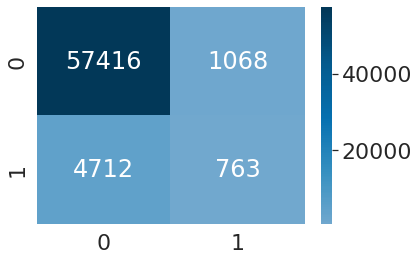

Confusion Matrix is
 [[57416  1068]
 [ 4712   763]]


In [ ]:
from sklearn.metrics import confusion_matrix

y_pred_XGB = XGBModel.predict(X_val)
CM_XGB = confusion_matrix(y_val, y_pred_XGB)

sns.heatmap(CM_XGB, center=True, cmap = colormap, linecolor = "white", annot = True, fmt = 'd')
plt.show()

print('Confusion Matrix is\n', CM_XGB)

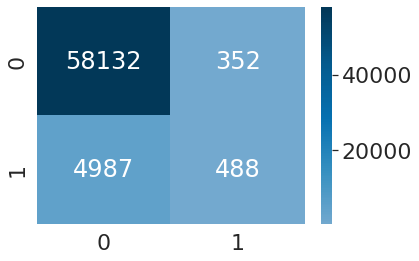

Confusion Matrix is
 [[58132   352]
 [ 4987   488]]


In [ ]:
from sklearn.metrics import confusion_matrix

y_pred_XGB = XGBModel_best_ac.predict(X_val)
CM_XGB = confusion_matrix(y_val, y_pred_XGB)

sns.heatmap(CM_XGB, center=True, cmap = colormap, linecolor = "white", annot = True, fmt = 'd')
plt.show()

print('Confusion Matrix is\n', CM_XGB)

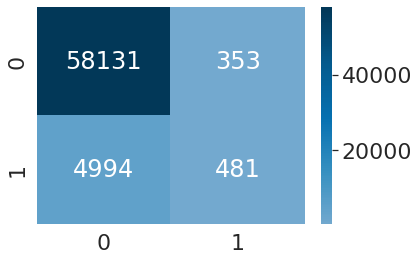

Confusion Matrix is
 [[58131   353]
 [ 4994   481]]


In [ ]:
from sklearn.metrics import confusion_matrix

y_pred_XGB = XGBModel_best_f1.predict(X_val)
CM_XGB = confusion_matrix(y_val, y_pred_XGB)

sns.heatmap(CM_XGB, center=True, cmap = colormap, linecolor = "white", annot = True, fmt = 'd')
plt.show()

print('Confusion Matrix is\n', CM_XGB)

In [ ]:
print("precision score(Depth 3) :",precision_score(y_val, XGBModel_pred_ac))
print("precision score(Depth 5) :",precision_score(y_val, XGBModel_pred_f1))

print("recall score(Depth 3) :",recall_score(y_val, XGBModel_pred_ac))
print("recall score(Depth 5) :",recall_score(y_val, XGBModel_pred_f1))

print("f1 score(Depth 3) :",f1_score(y_val, XGBModel_pred_ac))
print("f1 score(Depth 5) :",f1_score(y_val, XGBModel_pred_f1))

print("accuracy score(Depth 3) :",accuracy_score(y_val, XGBModel_pred_ac))
print("accuracy score(Depth 5) :",accuracy_score(y_val, XGBModel_pred_f1))

precision score(Depth 3) : 0.5571428571428572
precision score(Depth 5) : 0.5551643192488263
recall score(Depth 3) : 0.08547945205479453
recall score(Depth 5) : 0.08639269406392694
f1 score(Depth 3) : 0.1482185273159145
f1 score(Depth 5) : 0.14951793899162322
accuracy score(Depth 3) : 0.9158992479557216
accuracy score(Depth 5) : 0.9158679779233572


# 6. Model Assessment

### Baseline model

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


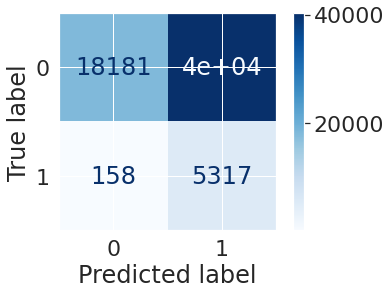

In [ ]:
#LR without SMOTE
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(lrmodel_best_f1, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

In [ ]:
y_pred_test = lrmodel_best_f1.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.31      0.47     58484
           1       0.12      0.97      0.21      5475

    accuracy                           0.37     63959
   macro avg       0.55      0.64      0.34     63959
weighted avg       0.92      0.37      0.45     63959



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


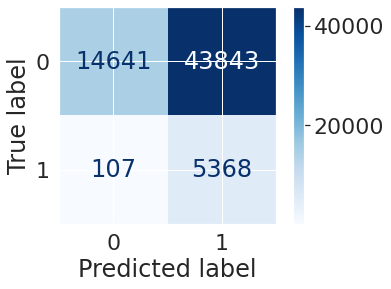

In [ ]:
#LR with SMOTE
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(lrmodel_best_f1_b, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

In [ ]:
y_pred_test = lrmodel_best_f1_b.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.25      0.40     58484
           1       0.11      0.98      0.20      5475

    accuracy                           0.31     63959
   macro avg       0.55      0.62      0.30     63959
weighted avg       0.92      0.31      0.38     63959



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


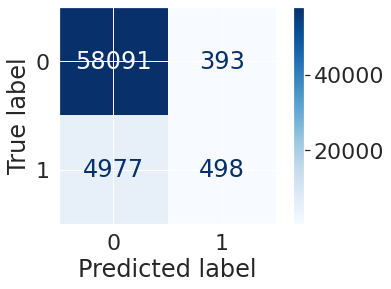

In [ ]:
#GBC without SMOTE
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(GBCModel_best_f1, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

In [ ]:
y_pred_test = GBCModel_best_f1.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     58484
           1       0.56      0.09      0.16      5475

    accuracy                           0.92     63959
   macro avg       0.74      0.54      0.56     63959
weighted avg       0.89      0.92      0.89     63959



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


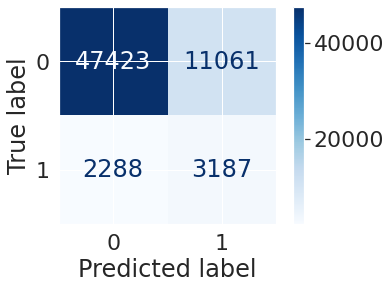

In [ ]:
#GBC with SMOTE
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(GBCmodel_smote_tuned, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

In [ ]:
y_pred_test = GBCmodel_smote_tuned.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.81      0.88     58484
           1       0.22      0.58      0.32      5475

    accuracy                           0.79     63959
   macro avg       0.59      0.70      0.60     63959
weighted avg       0.89      0.79      0.83     63959



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


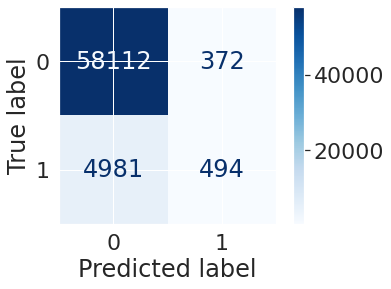

In [ ]:
#XGB
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(XGBModel_best_f1, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

In [ ]:
y_pred_test = XGBModel_best_f1.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     58484
           1       0.57      0.09      0.16      5475

    accuracy                           0.92     63959
   macro avg       0.75      0.54      0.56     63959
weighted avg       0.89      0.92      0.89     63959



### Focused Model - RF

1-1. Confusion matrix

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


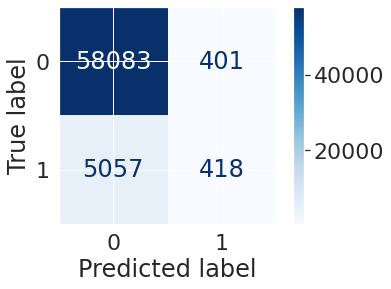

In [ ]:
# RF
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(rfmodel_best, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

1-2 precision,recall,f1-score,support

In [ ]:
# RF
y_pred_test = rfmodel_best.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     58484
           1       0.51      0.08      0.13      5475

    accuracy                           0.91     63959
   macro avg       0.72      0.53      0.54     63959
weighted avg       0.88      0.91      0.88     63959



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


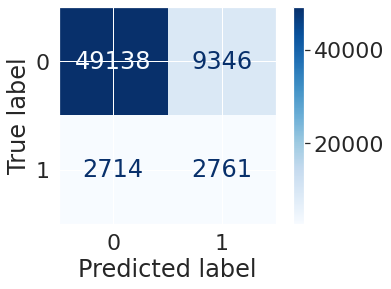

In [ ]:
# RF with SMOTE
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(rfmodel_smote_tuned, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

In [ ]:
y_pred_test = rfmodel_smote_tuned.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89     58484
           1       0.23      0.50      0.31      5475

    accuracy                           0.81     63959
   macro avg       0.59      0.67      0.60     63959
weighted avg       0.89      0.81      0.84     63959



In [ ]:
assessment = pd.DataFrame({'metric':['accuracy','precision','recall','f1-score', 'accuracy','precision','recall','f1-score'],
                           'model':['RandomForest','RandomForest','RandomForest','RandomForest', "B-model", "B-model", "B-model", "B-model"],
                           'degree':[0.93, 0.76, 0.20, 0.31, 0.1, 0.1, 0.1, 0.1]
                           }
                          #, index = ['rf']
                          )   

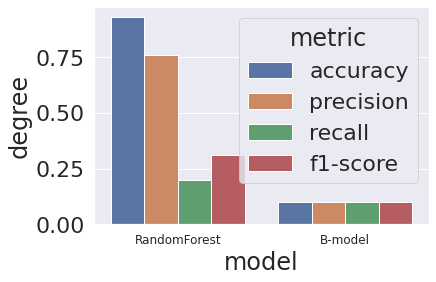

In [ ]:
import seaborn as sns
g = sns.barplot(data= assessment,x= "model", y= "degree", hue="metric")
ax = g

plt.xticks(fontsize=12, rotation=0)
plt.show()

2. Predicted probability of each data point

In [ ]:
print(rfmodel.predict_proba(X_test))

[[0.35038095 0.64961905]
 [1.         0.        ]
 [0.8        0.2       ]
 ...
 [0.84       0.16      ]
 [0.99444231 0.00555769]
 [0.39       0.61      ]]


3. ROC-AUC

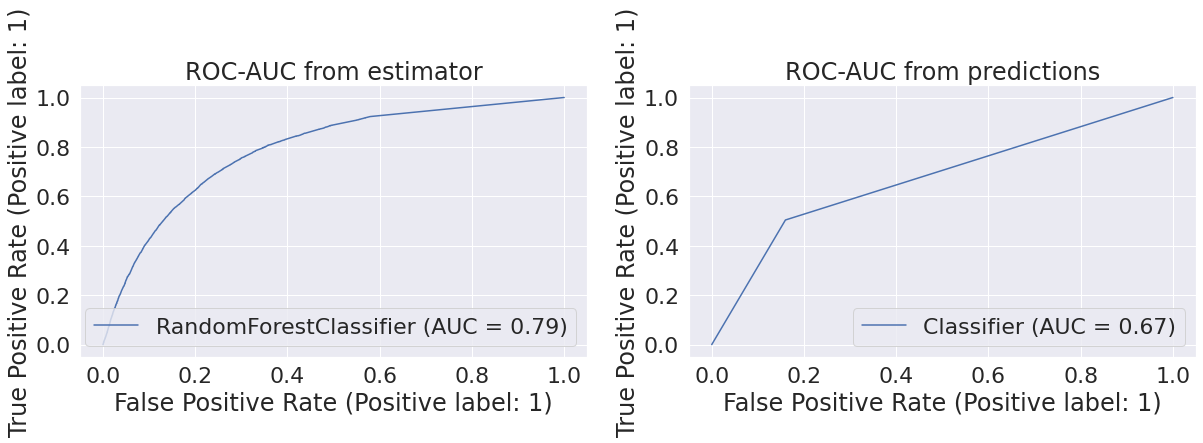

In [ ]:
from sklearn.metrics import RocCurveDisplay
fig, axes = plt.subplots(1, 2, figsize=(20,5))
axes[0].set_title('ROC-AUC from estimator')
axes[1].set_title('ROC-AUC from predictions')
RocCurveDisplay.from_estimator(rfmodel, X_test, y_test, ax=axes[0])
RocCurveDisplay.from_predictions(y_test, y_pred_test, ax=axes[1])

4. Tree Visualization

In [ ]:
from sklearn.tree import export_graphviz
estimator = rfmodel.estimators_[3]

export_graphviz(estimator, out_file='tree.dot',
                feature_names = X.columns,
                class_names = ['no','yes'],
                max_depth = 4, 
                precision = 3, # 소수점 표기 자릿수
                filled = True, # class별 color 채우기
                rounded=True, # 박스의 모양을 둥글게
                )

# 생성된 .dot 파일을 .png로 변환
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# jupyter notebook에서 .png 직접 출력
from IPython.display import Image
display(Image(filename = 'tree.png'))

# 7. Interpretation of the result

1. Feature Importance (Bar Graph)

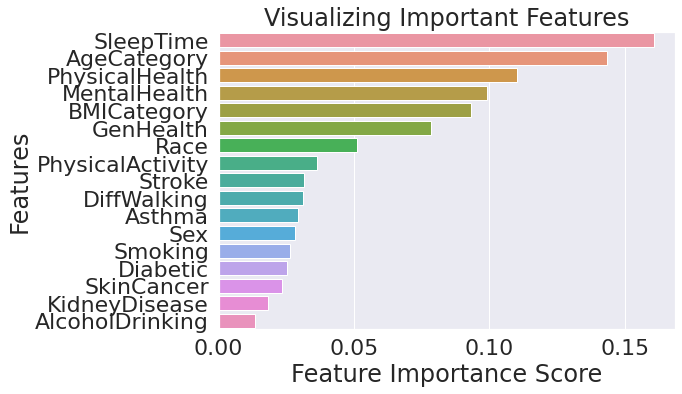

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

feature_imp = pd.Series(rfmodel.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()